In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn import metrics

import xgboost as xgb
import lightgbm as lgb

In [4]:
movie_md = pd.read_csv('movies_metadata.csv')
movie_md.head(5)

/var/folders/rf/h6_7bsv91nscjbz1j5xqns5r0000gp/T/ipykernel_74133/2067859976.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_md = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
ratings = pd.read_csv('ratings_small.csv')
ratings = ratings.rename(columns={'movieId': 'id'})
ratings

,userId,id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [6]:
keywords = pd.read_csv("keywords.csv")
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


## Data cleaning

In [7]:
# Drop rows with incorrect values
movie_md = movie_md.drop(index= [19730, 29503, 35587])

# Drop unneeded columns
movie_md = movie_md.drop(["adult"], axis=1)
movie_md = movie_md.drop(["belongs_to_collection"], axis=1)
movie_md = movie_md.drop(["homepage"], axis=1)
movie_md = movie_md.drop(["original_title"], axis=1)
movie_md = movie_md.drop(["overview"], axis=1)
movie_md = movie_md.drop(["poster_path"], axis=1)
movie_md = movie_md.drop(["spoken_languages"], axis=1)
movie_md = movie_md.drop(["status"], axis=1)
movie_md = movie_md.drop(["tagline"], axis=1)
movie_md = movie_md.drop(["title"], axis=1)
movie_md = movie_md.drop(["video"], axis=1)

In [8]:
# Budget column: median imputation 
movie_md['budget'] = movie_md['budget'].astype(int)
budget_med = movie_md['budget'].mean()
movie_md['budget'] = movie_md['budget'].fillna(budget_med)

# Revenue column: median imputation
rev_med = movie_md.revenue.median()
movie_md.revenue = movie_md.revenue.fillna(rev_med)

# Runtime column: median imputation
movie_md.runtime = movie_md.runtime.fillna(movie_md.runtime.median())

# Vote_count column: median imputation
# movie_md["vote_count"] = movie_md.fillna(movie_md["vote_count"].median())

# Release_date column: convert to datetime and median imputation
movie_md["release_date"] = pd.to_datetime(movie_md["release_date"]).dt.month
month_mode = movie_md.release_date.mode()
movie_md.release_date = movie_md.release_date.fillna(month_mode)

# Original_language column: imputation
movie_md.original_language = movie_md.original_language.fillna(movie_md.original_language.mode()[0])

# Popularity column: median imputation
pop_med = movie_md["popularity"].median()
movie_md['popularity'] = movie_md['popularity'].fillna(pop_med)
movie_md['popularity'] = movie_md['popularity'].astype(float)

# id column: convert to int
movie_md.id = movie_md.id.astype(int)

#Processing genres column
def process_genres(x):
    x = x.replace("[", "")
    x = x.replace("]", "")
    x = re.split(r'{(.*?)}', x)[1:-1]
    x = [n for n in x if n != ', ']
    
    for i in range(len(x)):
        x[i] = '{' + x[i] + '}'
    
    for i in range(len(x)):
        x[i] = eval(x[i])
    
    return str([n.get('name') for n in x])

movie_md.genres = movie_md.genres.apply(lambda x: process_genres(x))

#Processing production_companies and production_countries
def process_prod(x):
    if type(x) == float:
        return 'Unknown'
    if x == '[]':
        return 'Unknown'
    else:
        x = x.replace('[', '')
        x = x.replace(']', '')
        x = eval(x)
        if type(x) == tuple:
            return x[0].get('name')
        else:
            return x.get('name')
        
movie_md.production_companies = movie_md.production_companies.apply(lambda x: process_prod(x))
movie_md.production_countries = movie_md.production_countries.apply(lambda x: process_prod(x))

movie_md.production_companies.fillna('Unknown')
movie_md.production_countries.fillna('Unknown')


# Merge movie_md and ratings
movie_md.id = movie_md.id.astype(int)
merged = pd.merge(movie_md, ratings, how='left', on='id')

# Ratings column: median imputation
ratings_med = ratings["rating"].median()
merged["rating"] = merged["rating"].fillna(ratings_med)

# Remove rows with budget or revenue less than 100,000 
merged = merged[merged["budget"] > 10000]
merged = merged[merged["revenue"] > 10000]

# Drop unneeded columns from merged
merged = merged.drop(["userId"], axis=1)
merged = merged.drop(["timestamp"], axis=1)

merged

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,rating
0,30000000,"['Animation', 'Comedy', 'Family']",862,tt0114709,en,21.946943,Pixar Animation Studios,United States of America,10.0,373554033.0,81.0,7.7,5415.0,4.0
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,en,17.015539,TriStar Pictures,United States of America,12.0,262797249.0,104.0,6.9,2413.0,4.0
3,16000000,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,en,3.859495,Twentieth Century Fox Film Corporation,United States of America,12.0,81452156.0,127.0,6.1,34.0,4.0
5,60000000,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,en,17.924927,Regency Enterprises,United States of America,12.0,187436818.0,170.0,7.7,1886.0,3.5
6,60000000,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,en,17.924927,Regency Enterprises,United States of America,12.0,187436818.0,170.0,7.7,1886.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87294,11000000,"['Action', 'Crime', 'Mystery', 'Thriller']",395834,tt5362988,en,40.796775,Thunder Road Pictures,United Kingdom,8.0,184770205.0,111.0,7.4,181.0,4.0
87377,12000000,"['Action', 'Comedy', 'Drama']",24049,tt0479751,ta,1.323587,AVM Productions,India,6.0,19000000.0,185.0,6.9,25.0,4.0
87569,800000,"['Comedy', 'Drama']",62757,tt0933361,en,0.903061,Unknown,Unknown,11.0,1328612.0,100.0,5.8,6.0,4.0
87572,2000000,"['Romance', 'Drama']",63281,tt1718881,en,0.121844,Profit,Russia,9.0,1268793.0,107.0,4.0,3.0,4.0


## EDA

(0.0, 22000.0)

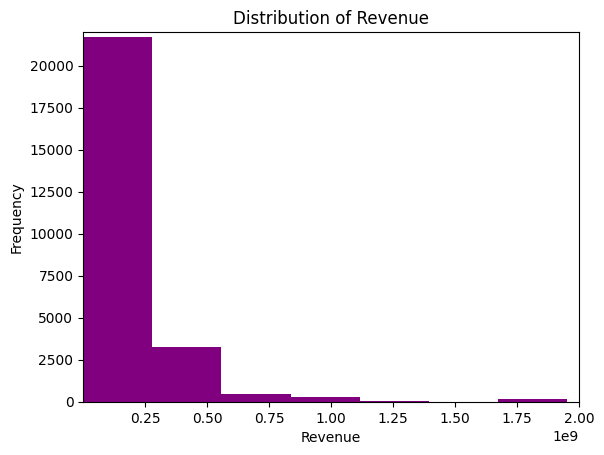

In [9]:
#Visualizing distribution of revenue
merged.revenue.plot(kind='hist', color='purple')
plt.xlabel('Revenue')
plt.title('Distribution of Revenue')
plt.xlim(10000,2000000000)
plt.ylim(0,22000)

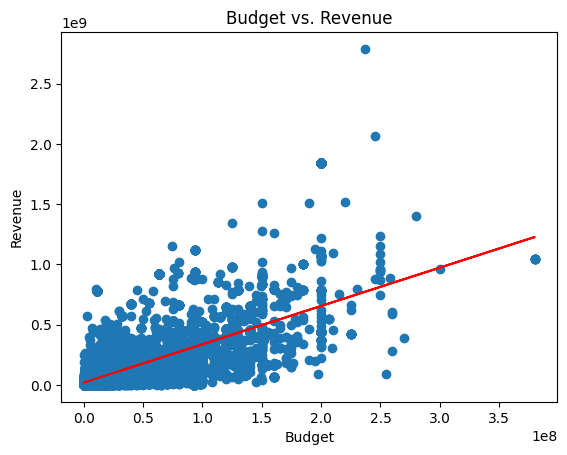

In [10]:
# Budget vs. revenue

linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(merged[['budget']], merged['revenue'])
Y_budget_pred = linear_regressor.predict(merged[['budget']])

plt.scatter(merged['budget'], merged['revenue'])
plt.plot(merged['budget'], Y_budget_pred, color='red')

plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs. Revenue")
plt.show()

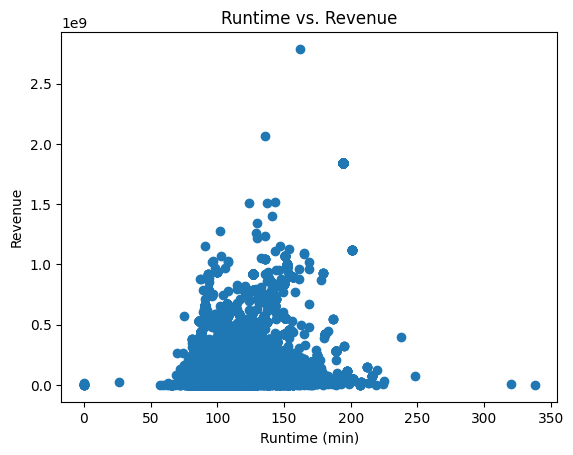

In [11]:
# Runtime vs. Revenue

plt.scatter(merged['runtime'], merged['revenue'])
plt.xlabel("Runtime (min)")
plt.ylabel("Revenue")
plt.title("Runtime vs. Revenue")
plt.show()

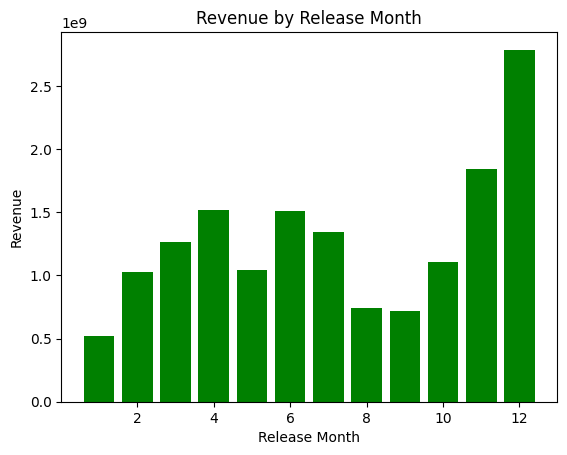

In [12]:
# Revenue by Release Month

plt.bar(merged['release_date'], merged['revenue'], color='green')
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Revenue by Release Month")
plt.show()

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

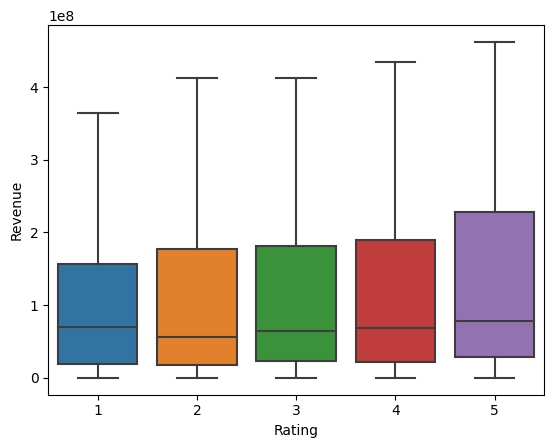

In [13]:
# Distribution of Rating vs. Revenue
rating_1 = merged[merged['rating'] == (1.0 or 0.5)]["revenue"]
rating_2 = merged[merged['rating'] == (1.5 or 2.0)]["revenue"]
rating_3 = merged[merged['rating'] == (2.5 or 3)]["revenue"]
rating_4 = merged[merged['rating'] == (3.5 or 4)]["revenue"]
rating_5 = merged[merged['rating'] == (4.5 or 5.0)]["revenue"]

box_plot = sns.boxplot(data=[rating_1, rating_2, rating_3, rating_4, rating_5], showfliers = False)
box_plot.set(xlabel='Rating',ylabel='Revenue')
box_plot.set_xticklabels(["1", "2", "3", "4", "5"])

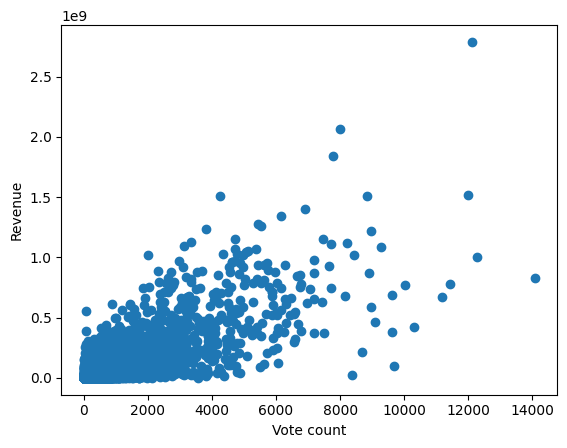

In [14]:
# Vote count vs. revenue

plt.scatter(movie_md['vote_count'], movie_md['revenue'])
plt.xlabel("Vote count")
plt.ylabel("Revenue")
plt.show()

/var/folders/rf/h6_7bsv91nscjbz1j5xqns5r0000gp/T/ipykernel_74133/1676062450.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_language = merged.groupby('original_language').median()


Text(0.5, 1.0, 'Revenue by Original Language')

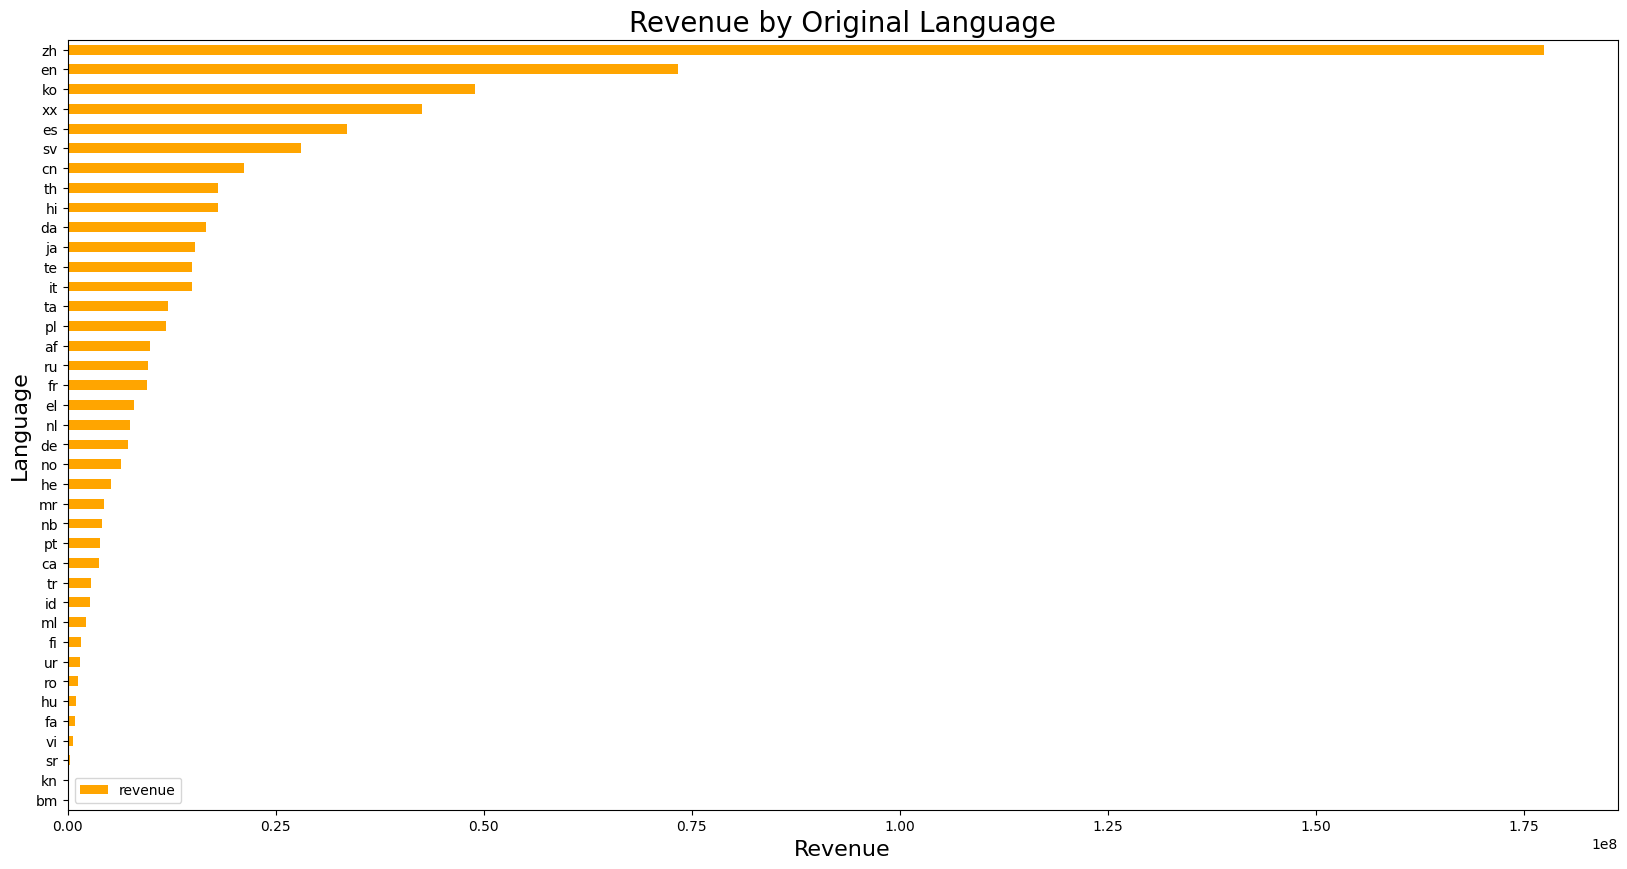

In [15]:
# Original Language vs. revenue

by_language = merged.groupby('original_language').median()
by_language = by_language.sort_values('revenue', ascending=True)
by_language = by_language.reset_index()
by_language.plot(x='original_language', y='revenue', kind='barh', figsize=(20,10), color='orange')
plt.xlabel("Revenue", fontsize=16)
plt.ylabel("Language", fontsize=16)
plt.title('Revenue by Original Language', fontsize=20)

Text(0, 0.5, 'Revenue')

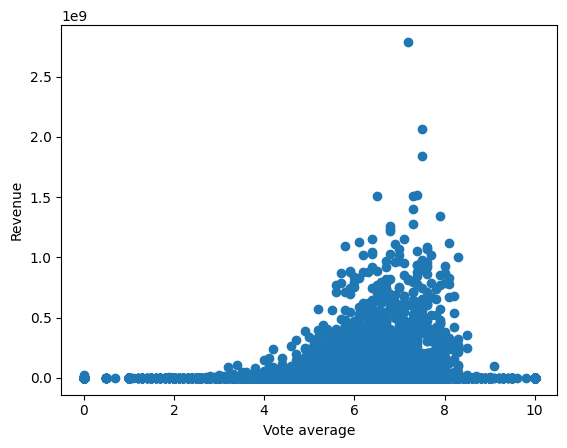

In [16]:
# Vote average vs. revenue

plt.scatter(movie_md['vote_average'], movie_md['revenue'])
plt.xlabel("Vote average")
plt.ylabel("Revenue")

Text(0, 0.5, 'Revenue')

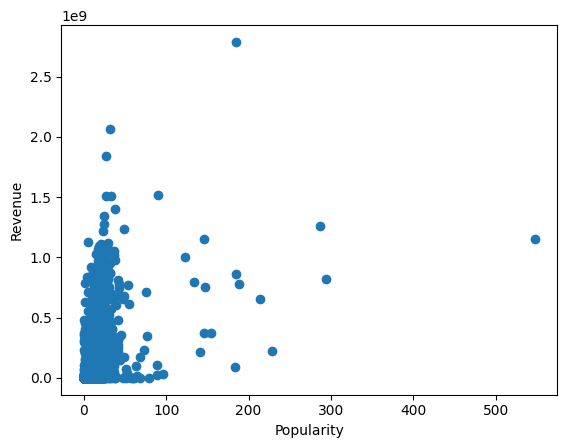

In [17]:
# Popularity vs. Revenue

plt.scatter(movie_md['popularity'], movie_md['revenue'])
plt.xlabel("Popularity")
plt.ylabel("Revenue")

## Log Transformation

In [19]:
# Create log-transformed table
merged_log = merged.copy()

merged_log.revenue = np.log(merged_log.revenue)
merged_log.budget = np.log(merged_log.budget)

# transform popularity
merged_log.popularity = merged_log.popularity + 1
merged_log.popularity = np.log(merged_log.popularity)

# transform vote average
merged_log.vote_average = merged_log.vote_average + 1
merged_log.vote_average = np.log(merged_log.vote_average)

# transform vote count
merged_log.vote_count = merged_log.vote_count + 1
merged_log.vote_count = np.log(merged_log.vote_count)

merged_log.head()

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,rating
0,17.216708,"['Animation', 'Comedy', 'Family']",862,tt0114709,en,3.133185,Pixar Animation Studios,United States of America,10.0,19.738573,81.0,2.163323,8.597113,4.0
1,17.989898,"['Adventure', 'Fantasy', 'Family']",8844,tt0113497,en,2.891235,TriStar Pictures,United States of America,12.0,19.386893,104.0,2.066863,7.789040,4.0
3,16.588099,"['Comedy', 'Drama', 'Romance']",31357,tt0114885,en,1.580935,Twentieth Century Fox Film Corporation,United States of America,12.0,18.215526,127.0,1.960095,3.555348,4.0
5,17.909855,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,en,2.940480,Regency Enterprises,United States of America,12.0,19.048952,170.0,2.163323,7.542744,3.5
6,17.909855,"['Action', 'Crime', 'Drama', 'Thriller']",949,tt0113277,en,2.940480,Regency Enterprises,United States of America,12.0,19.048952,170.0,2.163323,7.542744,4.0


Text(0.5, 1.0, 'Distribution of Revenue')

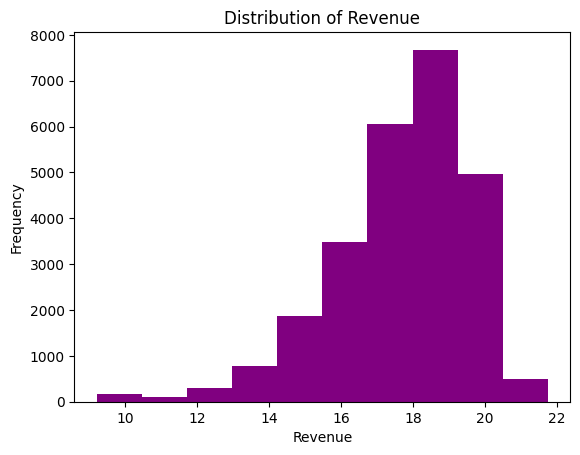

In [107]:
#Visualizing distribution of revenue after log transformation
merged_log.revenue.plot(kind='hist', color='purple')
plt.xlabel('Revenue')
plt.title('Distribution of Revenue')

## Baseline Models

In [21]:
# Create table of numeric features only for baseline regression models
baseline = merged_log[["budget", "popularity", "runtime", "vote_average", "vote_count", "revenue"]]
baseline.head()

,budget,popularity,runtime,vote_average,vote_count,revenue
0,17.216708,3.133185,81.0,2.163323,8.597113,19.738573
1,17.989898,2.891235,104.0,2.066863,7.789040,19.386893
3,16.588099,1.580935,127.0,1.960095,3.555348,18.215526
5,17.909855,2.940480,170.0,2.163323,7.542744,19.048952
6,17.909855,2.940480,170.0,2.163323,7.542744,19.048952


### Linear Regression

In [109]:
X = baseline.drop('revenue', axis=1)
y = baseline['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

regr = LinearRegression()
regr.fit(X_train, y_train)

pred = regr.predict(X_test)

linear_baseline = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Linear Regression RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(pred, y_test)))

Linear Regression RMSE: 1.14


### Random Forest

In [110]:
X = baseline.drop('revenue', axis=1)
y = baseline['revenue']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

clf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

rf_pred = clf.predict(X_test)

rf_baseline = np.sqrt(metrics.mean_squared_error(rf_pred, y_test))
print("Random Forest RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(rf_pred, y_test)))

Random Forest RMSE: 0.91


### XGBoost

In [111]:
X = baseline.drop('revenue', axis=1)
y = baseline['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)

xg_baseline = (mse**(1/2.0))
print("XGBoost RMSE: %.2f" % (mse**(1/2.0)))

XGBoost RMSE: 0.60


### LightGBM

In [114]:
X = baseline.drop('revenue', axis=1)
y = baseline['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

model = lgb.LGBMRegressor()

model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)

lgb_baseline = mse**(1/2.0)
print("LightGBM RMSE: %.2f" % (mse**(1/2.0)))

LightGBM RMSE: 0.64


In [116]:
# Create table of baselines

base_dict = {'linear regression': linear_baseline,
                 'random forest': rf_baseline,
                   'xgboost': xg_baseline,
                   "lightgbm": lgb_baseline,
                  }


base_table = pd.DataFrame(list(base_dict.items()), columns=['model', 'rmse'])
base_table

,model,rmse
0,linear regression,1.141789
1,random forest,0.909145
2,xgboost,0.597711
3,lightgbm,0.644301


## Final Models

### LightGBM

#### Choosing features:

In [103]:
lgb_table = merged_log[["budget", "popularity", "runtime", "vote_average", "vote_count", "revenue", "rating", 
                    "original_language", "release_date", "production_companies", "production_countries",
                   "genres"]]

# lgb_table = merged_log[["budget", "popularity", "runtime", "vote_average", "vote_count", "revenue", "genres"]]

lgb_table.head()

,budget,popularity,runtime,vote_average,vote_count,revenue,rating,original_language,release_date,production_companies,production_countries,genres
0,17.216708,3.133185,81.0,2.163323,8.597113,19.738573,4.0,en,10.0,Pixar Animation Studios,United States of America,"['Animation', 'Comedy', 'Family']"
1,17.989898,2.891235,104.0,2.066863,7.789040,19.386893,4.0,en,12.0,TriStar Pictures,United States of America,"['Adventure', 'Fantasy', 'Family']"
3,16.588099,1.580935,127.0,1.960095,3.555348,18.215526,4.0,en,12.0,Twentieth Century Fox Film Corporation,United States of America,"['Comedy', 'Drama', 'Romance']"
5,17.909855,2.940480,170.0,2.163323,7.542744,19.048952,3.5,en,12.0,Regency Enterprises,United States of America,"['Action', 'Crime', 'Drama', 'Thriller']"
6,17.909855,2.940480,170.0,2.163323,7.542744,19.048952,4.0,en,12.0,Regency Enterprises,United States of America,"['Action', 'Crime', 'Drama', 'Thriller']"


In [64]:
X = lgb_table.drop('revenue', axis=1)
y = lgb_table['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)


preproc = ColumnTransformer(
            transformers = [
                ('categorical', OneHotEncoder(handle_unknown='ignore'), ['genres'])#,
#                 ('ordinal', OrdinalEncoder(), ['rating']),
                ],
                remainder = 'passthrough'
                )

preproc.fit(X_train, y_train)
preproc.transform(X_test)

pl = Pipeline([
    ('preprocessor', preproc),
    ('reg', lgb.LGBMRegressor())
])


pl.fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)



y_pred = pl.predict(X_test)

# add_rating = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# add_release_date = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# add_original_language = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# add_production_companies = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# add_production_countries = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# add_genres = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)



In [65]:
lgb_rmse_dict = {'baseline': 0.64,
    'add rating (ordinal)': add_rating, 
                'add release_date (categorical)': add_release_date,
                 'add original_language (categorical)': add_original_language,
                'add production_companies (categorical)': add_production_companies,
                'add production_countries (categorical)': add_production_countries,
                'add_genres (categorical)': add_genres
                }
lgb_rmse_dict

{'baseline': 0.64,
 'add rating (ordinal)': 0.6403245317842879,
 'add release_date (categorical)': 0.639122897398973,
 'add original_language (categorical)': 0.6380250735340317,
 'add production_companies (categorical)': 0.6224505602833885,
 'add production_countries (categorical)': 0.6282238244872461,
 'add_genres (categorical)': 0.6391301578330578}

In [68]:
lgb_rmse = pd.DataFrame(list(lgb_rmse_dict.items()), columns=['trial', 'rmse'])
lgb_rmse['pct_change_from_baseline'] = ((lgb_rmse['rmse'] - 0.64) / 0.64) * 100
lgb_rmse

,trial,rmse,pct_change_from_baseline
0,baseline,0.640000,0.000000
1,add rating (ordinal),0.640325,0.050708
2,add release_date (categorical),0.639123,-0.137047
3,add original_language (categorical),0.638025,-0.308582
4,add production_companies (categorical),0.622451,-2.742100
5,add production_countries (categorical),0.628224,-1.840027
6,add_genres (categorical),0.639130,-0.135913


#### Combinations of features:

In [92]:
lgb_combo_table = merged_log[["budget", "popularity", "vote_average", "revenue", 
                    "original_language", "release_date"]]
lgb_combo_table.head()

,budget,popularity,vote_average,revenue,original_language,release_date
0,17.216708,3.133185,2.163323,19.738573,en,10.0
1,17.989898,2.891235,2.066863,19.386893,en,12.0
3,16.588099,1.580935,1.960095,18.215526,en,12.0
5,17.909855,2.940480,2.163323,19.048952,en,12.0
6,17.909855,2.940480,2.163323,19.048952,en,12.0


In [99]:
X = lgb_combo_table.drop('revenue', axis=1)
y = lgb_combo_table['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)


preproc = ColumnTransformer(
            transformers = [
                ('categorical', OneHotEncoder(handle_unknown='ignore'), [ "original_language", "release_date"]),
                ],
                remainder = 'passthrough'
                )

preproc.fit(X_train, y_train)
preproc.transform(X_test)

pl = Pipeline([
    ('preprocessor', preproc),
    ('reg', lgb.LGBMRegressor())
])


pl.fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)



y_pred = pl.predict(X_test)

# combo_1 = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# combo_2 = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)
# combo_3 = metrics.mean_squared_error(y_test, y_pred) **(1/2.0)


In [101]:
lgb_combos_dict = {'baseline': 0.64,
                 'all features except rating': combo_1,
                   'all features': combo_2,
                   "budget, pop, vote_avg, revenue, ol, release": combo_3,
                  }


lgb_combo = pd.DataFrame(list(lgb_combos_dict.items()), columns=['trial', 'rmse'])
lgb_combo['pct_change_from_baseline'] = ((lgb_combo['rmse'] - 0.64) / 0.64) * 100
lgb_combo

,trial,rmse,pct_change_from_baseline
0,baseline,0.640000,0.000000
1,all features except rating,0.595209,-6.998549
2,all features,0.594419,-7.122003
3,"budget, pop, vote_avg, revenue, ol, release",0.715540,11.803198


#### Hyperparameter tuning:

In [108]:
X = lgb_table.drop('revenue', axis=1)
y = lgb_table['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)


params ={'reg__num_leaves': [80, 100, 150, 200, 500],
         'reg__n_estimators': [1500, 2000, 3000],
        'reg__max_depth': [22, 25, 30, 35],
         'reg__learning_rate': [0.01]
        }

preproc = ColumnTransformer(
            transformers = [
                ('categorical', OneHotEncoder(handle_unknown='ignore'), ['original_language', 'release_date', 
                                                                         'production_companies', 'production_countries',
                                                                        'genres']),
                ('ordinal', OrdinalEncoder(), ['rating']),
                ],
                remainder = 'passthrough'
                )

preproc.fit(X_train, y_train)
preproc.transform(X_test)

pl = Pipeline([
    ('preprocessor', preproc),
    ('reg', lgb.LGBMRegressor())
])


searcher = RandomizedSearchCV(pl,
                         param_distributions=params,
                         n_iter=25,
                         verbose=1)

searcher.fit(X_train, y_train)
searcher.score(X_test, y_test), searcher.score(X_train, y_train)




y_pred = searcher.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

print("Best parameters:", searcher.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.5377238088339963
Best parameters: {'reg__num_leaves': 80, 'reg__n_estimators': 2000, 'reg__max_depth': 25, 'reg__learning_rate': 0.01}


### XGBoost

In [117]:
xgb_table = merged_log[['revenue','budget', 'popularity', 'runtime', \
                    'vote_average', 'vote_count',
                   'production_countries']]

xgb_table.head()     

,revenue,budget,popularity,runtime,vote_average,vote_count,production_countries
0,19.738573,17.216708,3.133185,81.0,2.163323,8.597113,United States of America
1,19.386893,17.989898,2.891235,104.0,2.066863,7.789040,United States of America
3,18.215526,16.588099,1.580935,127.0,1.960095,3.555348,United States of America
5,19.048952,17.909855,2.940480,170.0,2.163323,7.542744,United States of America
6,19.048952,17.909855,2.940480,170.0,2.163323,7.542744,United States of America


#### Choosing features:

In [118]:
X = xgb_table.drop('revenue', axis=1)
y = xgb_table['revenue']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)


full_processor = ColumnTransformer(
            transformers = [
                ('categorical', OneHotEncoder(handle_unknown='ignore'), ['production_countries'])
            ],
                remainder = 'passthrough'
                )

trained_proc = full_processor.fit(X_train, y_train)
trained_proc.transform(X_test)

xgbr = xgb.XGBRegressor(objective='reg:squarederror')

pl = Pipeline([
    ('preprocessor', full_processor),
    ('reg', xgbr)
])


pl.fit(X_train, y_train)
y_pred = pl.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.5968778489788437

In [119]:
xgboost_rmse_features = pd.DataFrame({'trials':['baseline', \
                        "rating (ordinal)", 'original_language (categorical)', \
                                           'release_date (categorical)','genres (categorical)', \
                                            'production_countries (categorical)',\
                                           'production_companies (categorical)', \
                                                'production_countries + original_language',\
                                               'production_countries + rating', 'all features'],
              'XGBoost_rmse':[0.60, 0.614962128310039, 0.6117606532980497, \
                              0.61282618726236, 0.6457112524029274, \
                              0.5968778489788437, 0.6320091378462374, \
                              0.6118326531392554, 0.6032312976409392, 0.602448708874647]})

xgboost_rmse_features['percent_change_from_baseline_rmse'] =  round((xgboost_rmse_features['XGBoost_rmse'] -  0.60)/ xgboost_rmse_features['XGBoost_rmse'], 6)        
xgboost_rmse_features

,trials,XGBoost_rmse,percent_change_from_baseline_rmse
0,baseline,0.600000,0.000000
1,rating (ordinal),0.614962,0.024330
2,original_language (categorical),0.611761,0.019224
3,release_date (categorical),0.612826,0.020930
4,genres (categorical),0.645711,0.070792
5,production_countries (categorical),0.596878,-0.005231
6,production_companies (categorical),0.632009,0.050647
7,production_countries + original_language,0.611833,0.019340
8,production_countries + rating,0.603231,0.005357
9,all features,0.602449,0.004065


#### Hyperparameter tuning:

In [120]:
X = xgb_table.drop('revenue', axis=1)
y = xgb_table['revenue']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

params = { 'reg__n_estimators': [5000],
     'reg__max_depth': [6],
     'reg__learning_rate': [0.05],
          'reg__colsample_bytree':[1],
           'reg__subsample':[0.5],
         }


full_processor = ColumnTransformer(
            transformers = [
                #('ordinal', OrdinalEncoder(), ['rating']),
                ('categorical', OneHotEncoder(handle_unknown='ignore'), [
                                                                        'production_countries',\
                                                                        ]),
                ],
                remainder = 'passthrough'
                )

trained_proc = full_processor.fit(X_train, y_train)
trained_proc.transform(X_test)

xgbr = xgb.XGBRegressor(objective='reg:squarederror')

pl = Pipeline([
    ('preprocessor', full_processor),
    ('reg', xgbr)
])

searcher = RandomizedSearchCV(pl,
                         param_distributions=params,
                         n_iter=25,
                         verbose=1)

searcher.fit(X_train, y_train)
searcher.score(X_test, y_test), searcher.score(X_train, y_train)

y_pred = searcher.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=25. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.586846077860239